# <h1 style="text-align: center;">Aircraft Analysis: Insights from U.S. Aviation Accident Data.</h1>

## Introduction
Our company is entering the aviation industry, and we need to make smart choices to keep risks low. This project uses Aviation Accident data from the U.S. National Transportation Safety Board (NTSB) to help us make good buying decisions. 

I will do this by carefully looking at, cleaning, and studying the data. The information I will find will give clear advice to the head of our new aviation department. This advice will help  pick aircraft that are safer, allowing our company to start this new business with a stronger and more secure beginning.

## Data Understanding
This project relies on Aviation Accident data from [Kaggle](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses), originally from the U.S. National Transportation Safety Board (NTSB). For full project context and key questions, refer to the [README](./README.md).

## 1. Data Exploration
With the project clearly explained, i will now load and explore the dataset to understand its structure, size, and contents. 

In [1]:
# Import relevant libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.available
plt.style.use('seaborn-darkgrid')

Next is Loading the  dataset and previewing the first 5 and last 5 records

In [2]:
# Load the aviation dataset 
df = pd.read_csv('Data/AviationData.csv', encoding = 'latin1', low_memory = False)

# Display the first 5 rows
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [3]:
# Check the summary of the dataset to see the number of rows, columns, data types and any missing values.


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [4]:
# Generate  descriptive statistics to get an overview of the distributions  of the data in the cell below
df.describe() 

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [5]:
# Explore the unique values in each column of our dataset
print("\nNumber of unique values in each column:")
df.nunique()


Number of unique values in each column:


Event.Id                  87951
Investigation.Type            2
Accident.Number           88863
Event.Date                14782
Location                  27758
Country                     219
Latitude                  25589
Longitude                 27154
Airport.Code              10375
Airport.Name              24871
Injury.Severity             109
Aircraft.damage               4
Aircraft.Category            15
Registration.Number       79105
Make                       8237
Model                     12318
Amateur.Built                 2
Number.of.Engines             7
Engine.Type                  13
FAR.Description              31
Schedule                      3
Purpose.of.flight            26
Air.carrier               13590
Total.Fatal.Injuries        125
Total.Serious.Injuries       50
Total.Minor.Injuries         57
Total.Uninjured             379
Weather.Condition             4
Broad.phase.of.flight        12
Report.Status             17075
Publication.Date           2924
dtype: i

In [6]:
# Check the datatypes in each column
df.dtypes

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status 

In [7]:
# Check for missing values
df.isnull().sum()

# Calculate the percentage of missing values per column
null_percent = (df.isnull().sum() / len(df)) * 100

# Sort the columns from highest percentage of missing values to lowest.
null_percent.sort_values(ascending = False)


Schedule                  85.845268
Air.carrier               81.271023
FAR.Description           63.974170
Aircraft.Category         63.677170
Longitude                 61.330423
Latitude                  61.320298
Airport.Code              43.469946
Airport.Name              40.611324
Broad.phase.of.flight     30.560587
Publication.Date          15.492356
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Fatal.Injuries      12.826109
Engine.Type                7.961615
Report.Status              7.178616
Purpose.of.flight          6.965991
Number.of.Engines          6.844491
Total.Uninjured            6.650992
Weather.Condition          5.053494
Aircraft.damage            3.593246
Registration.Number        1.481623
Injury.Severity            1.124999
Country                    0.254250
Amateur.Built              0.114750
Model                      0.103500
Make                       0.070875
Location                   0.058500
Event.Date                 0

In [8]:
# Check for duplicates in the dataset
df.duplicated().sum()

0

#### Conclusion on Data Exploration
The dataset contains a mix of categorical and numerical features related to aviation accidents. No duplicate records were found, but several columns contain missing values and will require cleaning. I will focus on selecting relevant columns for deeper analysis, with the goal of identifying patterns and risk factors that can support safer aircraft acquisition decisions.

## 2. Data Cleaning
Data cleaning is a crucial step to ensure the quality and reliability of the analysis. In this section i will handle missing values and correct inconsistent data formats. Clean data will help produce accurate insights that support better decision-making.

First is to standardize Column Names since some use dot  like, `Event.Id`, `Total.Fatal.Injuries`. Let's clean them.

In [9]:
# Let's check the column names here
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [10]:
# Cleaning now column names
df.columns = df.columns.str.capitalize().str.replace('.', '_', regex = False)
df.columns

Index(['Event_id', 'Investigation_type', 'Accident_number', 'Event_date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport_code',
       'Airport_name', 'Injury_severity', 'Aircraft_damage',
       'Aircraft_category', 'Registration_number', 'Make', 'Model',
       'Amateur_built', 'Number_of_engines', 'Engine_type', 'Far_description',
       'Schedule', 'Purpose_of_flight', 'Air_carrier', 'Total_fatal_injuries',
       'Total_serious_injuries', 'Total_minor_injuries', 'Total_uninjured',
       'Weather_condition', 'Broad_phase_of_flight', 'Report_status',
       'Publication_date'],
      dtype='object')

In [11]:
# Check each column dtypes
df.dtypes

Event_id                   object
Investigation_type         object
Accident_number            object
Event_date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport_code               object
Airport_name               object
Injury_severity            object
Aircraft_damage            object
Aircraft_category          object
Registration_number        object
Make                       object
Model                      object
Amateur_built              object
Number_of_engines         float64
Engine_type                object
Far_description            object
Schedule                   object
Purpose_of_flight          object
Air_carrier                object
Total_fatal_injuries      float64
Total_serious_injuries    float64
Total_minor_injuries      float64
Total_uninjured           float64
Weather_condition          object
Broad_phase_of_flight      object
Report_status 

Examining the columns, we see that the `Event_date` column is currently stored as an object data type. We  convert it into a proper datetime format using the `pd.to_datetime()` function to enable time-based analysis.

In [12]:
# Convert Event_date to datetime
df['Event_date'] = pd.to_datetime(df['Event_date'], errors = 'coerce')

# Check for dates not converted
print(f"The number not converted is : {df['Event_date'].isnull().sum()}")

# Extract Year to help in analysis
df['Year'] = df['Event_date'].dt.year

# Extract Month also
df['Month'] = df['Event_date'].dt.month
print("\nPreview the date and year")
print(df[['Event_date', 'Year', 'Month']].head())

The number not converted is : 0

Preview the date and year
  Event_date  Year  Month
0 1948-10-24  1948     10
1 1962-07-19  1962      7
2 1974-08-30  1974      8
3 1977-06-19  1977      6
4 1979-08-02  1979      8


Since injury columns have missing values, they likely indicate no injuries occurred or unreported incidents and they are `float64` and might have NaNs. I will fill NaNs with 0  and convert injury columns  to integers.

In [13]:
# Columns to clean and convert to integers
injury_cols = ['Total_fatal_injuries', 'Total_serious_injuries', 'Total_minor_injuries', 'Total_uninjured']

for col in injury_cols:
    # convert to numeric
    df[col] = pd.to_numeric(df[col], errors = 'coerce')
    # Fill missing values with 0
    df[col].fillna(0, inplace = True)
    # Convert to integer
    df[col] = df[col].astype(int)

print("\nInjury columns")
print(df[injury_cols].info())




Injury columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Total_fatal_injuries    88889 non-null  int32
 1   Total_serious_injuries  88889 non-null  int32
 2   Total_minor_injuries    88889 non-null  int32
 3   Total_uninjured         88889 non-null  int32
dtypes: int32(4)
memory usage: 1.4 MB
None


In [14]:
# Check missing values in each column again
df.isnull().sum()

Event_id                      0
Investigation_type            0
Accident_number               0
Event_date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport_code              38640
Airport_name              36099
Injury_severity            1000
Aircraft_damage            3194
Aircraft_category         56602
Registration_number        1317
Make                         63
Model                        92
Amateur_built               102
Number_of_engines          6084
Engine_type                7077
Far_description           56866
Schedule                  76307
Purpose_of_flight          6192
Air_carrier               72241
Total_fatal_injuries          0
Total_serious_injuries        0
Total_minor_injuries          0
Total_uninjured               0
Weather_condition          4492
Broad_phase_of_flight     27165
Report_status              6381
Publication_date          13771
Year    

We now handle the `Make` and `Model` columns since they define our aicraft type hence there will be need to  combine them. Also potential missing values will be dealt with.

In [15]:
# To minimize errors during concatenation i convert the columns to string
df['Make'] = df['Make'].astype(str)
df['Model'] = df['Model'].astype(str)
# Combine 'Make' and 'Model' into a new 'Aircraft_Type' column
df['Aircraft_Type'] = df['Make'] + ' ' + df['Model']
# Replace 'nan' string values that result from missing data in original Make/Model
df['Aircraft_Type'] = df['Aircraft_Type'].replace('nan nan', np.nan)
# Drop rows where 'Aircraft_Type' is still NaN
df.dropna(subset = ['Aircraft_Type'], inplace = True)

print(f"DataFrame shape after dropping missing Aircraft_Type: {df.shape}")

# Check unique values for `Aircraft_Type`
print(f"\nNumber of unique values: {df['Aircraft_Type'].nunique()}")
print(df['Aircraft_Type'].value_counts().head(10))

DataFrame shape after dropping missing Aircraft_Type: (88846, 34)

Number of unique values: 20182
Cessna 152         2168
Cessna 172         1254
Cessna 172N         996
Piper PA-28-140     812
Cessna 150          716
Cessna 172M         667
Cessna 172P         597
Cessna 150M         539
Piper PA-18         539
Piper PA-28-161     502
Name: Aircraft_Type, dtype: int64


Next we are going to clean `Weather_Condition` and `Broad_phase_of_flight`since they  are categorical and important. We'll check the unique values and consider standardization.

In [16]:
# Check 'Weather_Condition' value counts
df['Weather_condition'].value_counts(dropna=False)

df['Weather_condition'] = df['Weather_condition'].replace({'UNK': 'Unknown', 'Unk': 'Unknown'})
df['Weather_condition'].fillna('Unknown', inplace=True) # Fill missing values with unknown

print(df['Weather_condition'].value_counts(dropna=False)) # show the valuecounts after filling missing values



VMC        77295
IMC         5976
Unknown     5575
Name: Weather_condition, dtype: int64


In [17]:
# Check 'Broad_phase_of_flight'
df['Broad_phase_of_flight'].value_counts(dropna=False)

df['Broad_phase_of_flight'] = df['Broad_phase_of_flight'].replace({'Unk': 'Unknown'})
df['Broad_phase_of_flight'].fillna('Unknown', inplace=True) # Fill any actual NaNs
print("\nValue counts after filling missing values")
print(df['Broad_phase_of_flight'].value_counts(dropna=False))


Value counts after filling missing values
Unknown        27670
Landing        15428
Takeoff        12493
Cruise         10269
Maneuvering     8144
Approach        6546
Climb           2034
Taxi            1958
Descent         1887
Go-around       1353
Standing         945
Other            119
Name: Broad_phase_of_flight, dtype: int64


Now i will drop the original `Make` and `Model` columns as they are now combined into `Aircraft_Type` column. Also considering dropping other columns that are not directly used or have too many NaNs for this analysis.

In [18]:
# List of columns to drop.
columns_drop = [
    'Make', 'Model','Accident_number', 'Investigation_type', 'Event_id', 'Latitude', 'Longitude', 'Airport_code', 'Airport_name',
    'Publication_date',  'Report_status', 'Far_description', 'Aircraft_damage', 'Injury_severity','Aircraft_category', 'Air_carrier',
    'Engine_type', 'Schedule', 'Registration_number', 'Amateur_built']
# drop the columns
df.drop(columns=columns_drop, inplace=True, errors='ignore')

print(f"Dataframe after dropped columns : {df.shape}")

Dataframe after dropped columns : (88846, 14)


In [19]:
# Check for missing values again
df.isnull().sum()

Event_date                   0
Location                    52
Country                    225
Number_of_engines         6043
Purpose_of_flight         6153
Total_fatal_injuries         0
Total_serious_injuries       0
Total_minor_injuries         0
Total_uninjured              0
Weather_condition            0
Broad_phase_of_flight        0
Year                         0
Month                        0
Aircraft_Type                0
dtype: int64

Looking at the missing values above the `Number_of_engines` column still has missing values. Knowing if single-engine aircraft are riskier than multi-engine ones could be a key insight for your company. So i will proceed to clean the column.

In [20]:
# Clean the column
df['Number_of_engines'].value_counts(dropna=False)

# For number of engines, mode  makes sense as 1 and 2 are frequent
mode_engines = df['Number_of_engines'].mode()[0] # Gets the most frequent value
# Convert to int after filling NaNs
df['Number_of_engines'].fillna(mode_engines, inplace=True) # fill with mode
df['Number_of_engines'] = df['Number_of_engines'].astype(int) # convert to integer

print(df['Number_of_engines'].value_counts(dropna=False)) # show engines and counts

1    75624
2    11078
0     1226
3      483
4      431
8        3
6        1
Name: Number_of_engines, dtype: int64


Next we look at the `Purpose_of_flight` column. It has several missing values but it can provide insights if commercial passenger flights have different risk  than personal flights.

In [21]:
# Clean Purpose_of_flight
df['Purpose_of_flight'].value_counts(dropna = False)
# Fill with unknown 
df['Purpose_of_flight'].fillna('Unknown', inplace=True)

print("\n After Cleaning 'Purpose_of_flight' ")
print(df['Purpose_of_flight'].value_counts(dropna=False))


 After Cleaning 'Purpose_of_flight' 
Personal                     49446
Unknown                      12953
Instructional                10601
Aerial Application            4712
Business                      4018
Positioning                   1646
Other Work Use                1264
Ferry                          812
Aerial Observation             794
Public Aircraft                720
Executive/corporate            553
Flight Test                    405
Skydiving                      182
External Load                  123
Public Aircraft - Federal      105
Banner Tow                     101
Air Race show                   99
Public Aircraft - Local         74
Public Aircraft - State         64
Air Race/show                   59
Glider Tow                      53
Firefighting                    40
Air Drop                        11
ASHO                             6
PUBS                             4
PUBL                             1
Name: Purpose_of_flight, dtype: int64


In [22]:
# Lets run the missing value check again to see columns that have issues
df.isnull().sum()

Event_date                  0
Location                   52
Country                   225
Number_of_engines           0
Purpose_of_flight           0
Total_fatal_injuries        0
Total_serious_injuries      0
Total_minor_injuries        0
Total_uninjured             0
Weather_condition           0
Broad_phase_of_flight       0
Year                        0
Month                       0
Aircraft_Type               0
dtype: int64

Lastly the `Location` and `Country` columns still has missing value. I will consider dropping the rows with missing value to ensure I'm working with records where the location and country are known.

In [23]:
# Lets check the value_counts in the two columns
df[['Location', 'Country']].isnull().sum()

# Drop rows where 'Location' or 'Country' is missing
df.dropna(subset=['Location', 'Country'], inplace=True)

# Confirm if the missing values are still there
print(df[['Location', 'Country']].isnull().sum())

Location    0
Country     0
dtype: int64


In [24]:
#Final check on missing values
df.isnull().sum()

Event_date                0
Location                  0
Country                   0
Number_of_engines         0
Purpose_of_flight         0
Total_fatal_injuries      0
Total_serious_injuries    0
Total_minor_injuries      0
Total_uninjured           0
Weather_condition         0
Broad_phase_of_flight     0
Year                      0
Month                     0
Aircraft_Type             0
dtype: int64

In [33]:
# Save the modified DataFrame to a new Excel file
df.to_excel("clean_data.xlsx", index=False)
print("File successfully downloaded")

File successfully downloaded


### Conclusion
The initial `Aviation Accident` dataset  has been thoroughly cleaned and prepared. Key steps included standardizing column names, converting data types e.g dates to datetime, injuries columns to integers and creating a combined `Aircraft_Type` column. Importantly, all missing values in critical  columns have been addressed, resulting in a  dataset of 88,570 entries across 14 relevant columns. This cleaned data is now fully ready for Exploratory Data Analysis to identify low-risk aircraft.

# Exploratory Data Analysis
Having cleaned the dataset, the next  phase is Exploratory Data Analysis (EDA). EDA is an essential step in any data project, acting as a detective phase where we investigate the dataset's main characteristics and uncover patterns often with visual methods.

For this project, EDA will enable us to visually and statistically explore accident frequencies, fatality counts, and the influence of various factors like aircraft type, weather, and flight phase to directly address our company's goal of identifying the lowest-risk aircraft for acquisition.

#### Overall Accident Trends
We begin by looking at the number of accidents caused by aicraft types with a spacing of 10 year interval.

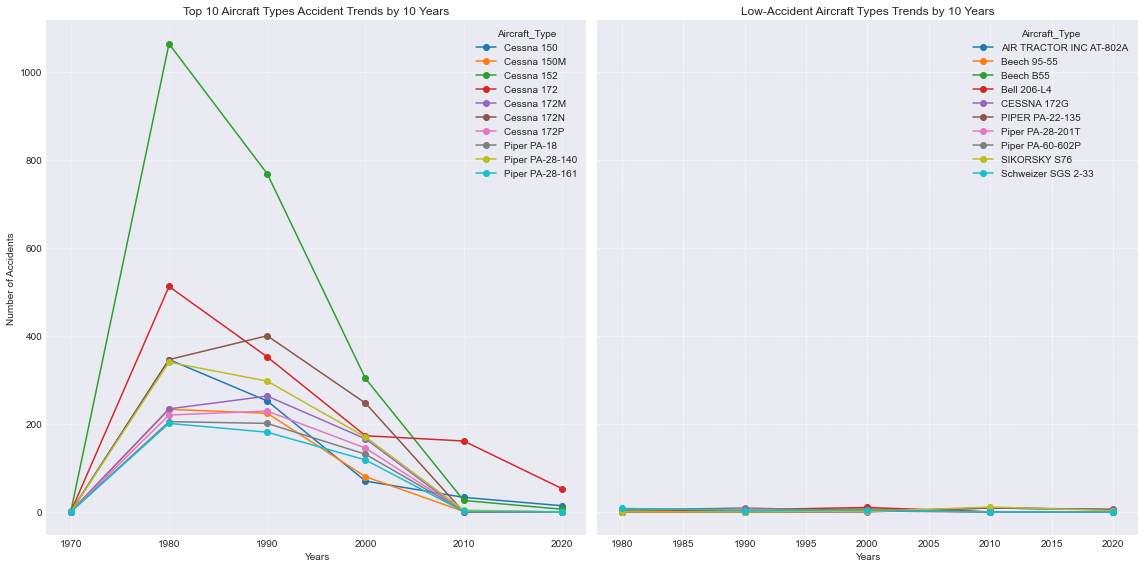

In [26]:

# Create column for 10-year intervals
df['Years_10'] = (df['Year'] // 10) * 10

# Find top 10 aircraft counts then groupby and pivot 
top_10_aircraft = df['Aircraft_Type'].value_counts().head(10).index
df_top = df[df['Aircraft_Type'].isin(top_10_aircraft)].copy()
accidents_top_10 = df_top.groupby(['Years_10', 'Aircraft_Type']).size().reset_index(name = 'Accident_Count')
pivot_top_10 = accidents_top_10.pivot(index='Years_10', columns = 'Aircraft_Type', values = 'Accident_Count').fillna(0)

# Find Low-accident aircraft counts then groupby and pivot Low-accident aircraft
aircraft_counts = df['Aircraft_Type'].value_counts()
low_aircraft = aircraft_counts[(aircraft_counts >= 5) & (aircraft_counts <= 15)].head(10).index
df_low = df[df['Aircraft_Type'].isin(low_aircraft)]
accidents_low = df_low.groupby(['Years_10', 'Aircraft_Type']).size().reset_index(name = 'Accident_Count')
pivot_low = accidents_low.pivot(index = 'Years_10', columns = 'Aircraft_Type', values = 'Accident_Count').fillna(0)

# Plotting 
fig, axes = plt.subplots(1, 2, figsize = (16, 8), sharey = True)

# Plotting the top 10
pivot_top_10.plot(ax = axes[0], kind = 'line', marker = 'o')
axes[0].set_title("Top 10 Aircraft Types Accident Trends by 10 Years")
axes[0].set_xlabel("Years")
axes[0].set_ylabel("Number of Accidents")
axes[0].grid(True, linestyle = '--', alpha = 0.5)

# Plot low-accident
pivot_low.plot(ax = axes[1], kind = 'line', marker = 'o')
axes[1].set_title("Low-Accident Aircraft Types Trends by 10 Years")
axes[1].set_xlabel("Years")
axes[1].grid(True, linestyle = '--', alpha = 0.8)

# Layout and show
plt.tight_layout() # ensuring everything fits well within the figure area
plt.savefig('Images/Trends.png', dpi=300, bbox_inches='tight') # saves visual to image folder of my project
plt.show()



The accident trend analysis reveals that aircraft like Cessna 152, Cessna 172, and Piper PA-28-140 have high accident counts .In contrast, aircraft such as Piper PA-34, Taylorcraft DCO-65, and Boeing 737-222 show flat, low accident trends. 

#### Aicraft types with high number of accidents
A bar chart of aircraft type vs number of accidents will help directly answer:
Which aircraft types have been involved in the most accidents overall?

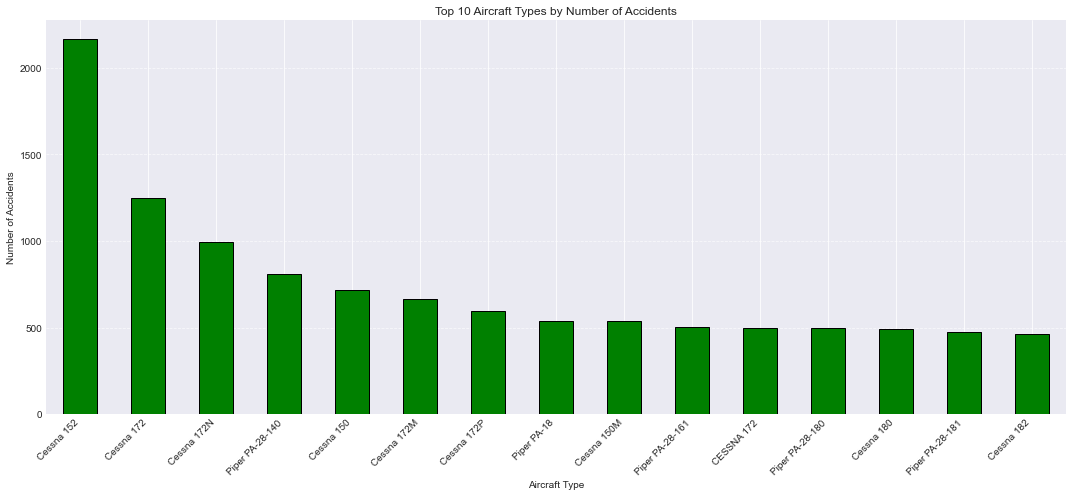

In [27]:
# Get value Count for top 15 aircrafts 
aircraft_accidents = df['Aircraft_Type'].value_counts().head(15)

# Plot
plt.figure(figsize =  (15, 7))
aircraft_accidents.plot(kind = 'bar', color = 'green', edgecolor = 'black')
plt.title('Top 10 Aircraft Types by Number of Accidents')
plt.xlabel('Aircraft Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation = 45, ha = 'right')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.tight_layout()
plt.savefig('Images/Accidents.png', dpi=300, bbox_inches='tight') # saves visual to image folder of my project
plt.show()


This chart highlights which aircraft have been most frequently involved in accidents. The Cessna 152 and Cessna 172 top the list.

#### Fatal Injuries Across  Aircraft Types
This visualization will use a barchart to compare the distribution of fatal injuries by aircraft types. The chart shows which aircraft types are deadliest based on total fatalities, even if they didn’t crash often.

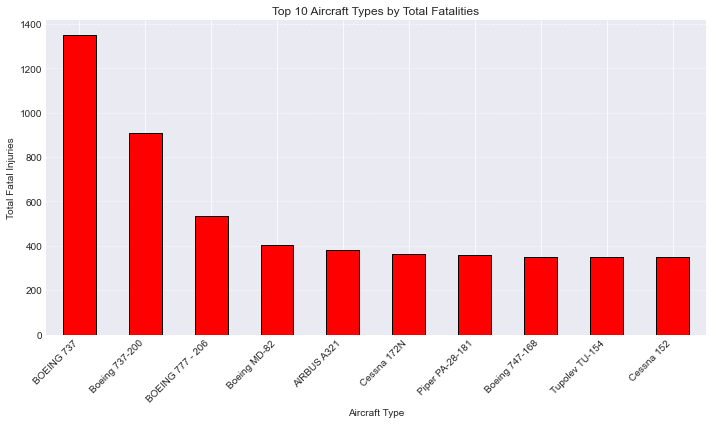

In [28]:
# Group by aircraft type and  fatalities
fatal_df = df.groupby('Aircraft_Type')['Total_fatal_injuries'].sum().sort_values(ascending = False).head(10)

# Plot
plt.figure(figsize = (10, 6))
fatal_df.plot(kind = 'bar', color = 'red', edgecolor = 'black')
plt.title("Top 10 Aircraft Types by Total Fatalities")
plt.xlabel("Aircraft Type")
plt.ylabel("Total Fatal Injuries")
plt.xticks(rotation = 45, ha = 'right')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.6)
plt.tight_layout()
plt.savefig('Images/Fatalities.png', dpi=300, bbox_inches='tight') # saves visual to image folder of my project
plt.show()



The analysis showed that the Boeing 737 and Boeing 737-200 accounted for the highest number of fatalities across all aircraft types in the dataset.

#### Impact of Weather
How an external factor weather, affects the accident data. We will create a visualization to show the distribution of accidents by `Weather_condition`.

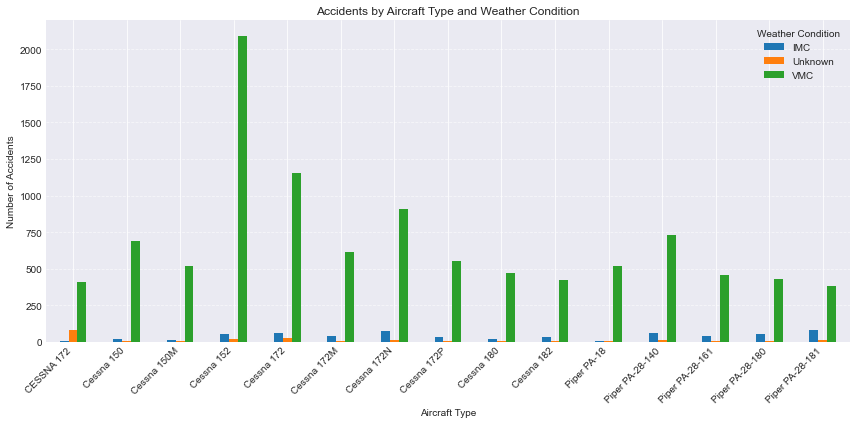

In [29]:
# Get top 15 aircrafts
top_15_aircraft = df['Aircraft_Type'].value_counts().head(15).index
df_top = df[df['Aircraft_Type'].isin(top_15_aircraft)]

# Group aicraft by weather
weather_by_aircraft = df_top.groupby(['Aircraft_Type', 'Weather_condition']).size().unstack(fill_value = 0)

# Plot
weather_by_aircraft.plot(kind = 'bar', figsize = (12, 6))
plt.title('Accidents by Aircraft Type and Weather Condition')
plt.xlabel('Aircraft Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation = 45, ha = 'right')
plt.legend(title = 'Weather Condition')
plt.tight_layout()
plt.grid(axis = 'y', linestyle = '--', alpha = 0.6)
plt.savefig('Images/Weather.png', dpi=300, bbox_inches='tight') # saves visual to image folder of my project
plt.show()


The chart shows that Cessna 152 and Cessna 172 have the highest number of accidents under  (VMC). 

#### Accident Distribution by Broad Phase of Flight
Shows which  phases of flight like Landing, Takeoff, Cruise are most commonly associated with accidents for each aircraft.

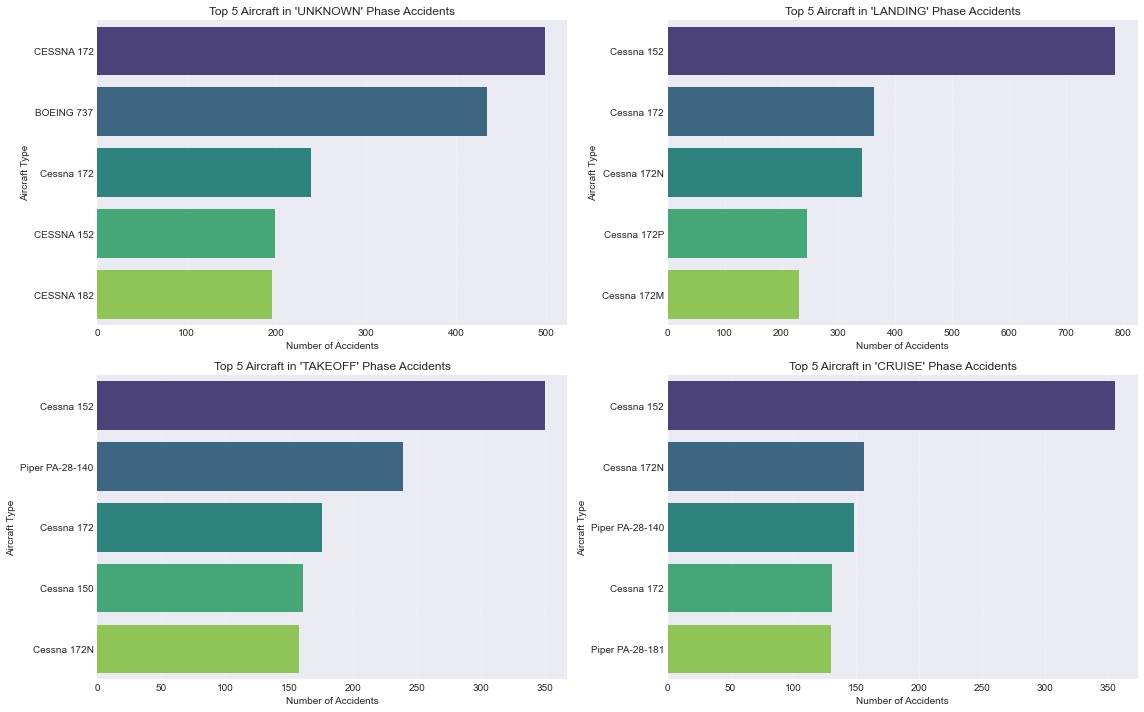

In [30]:
# Clean and standardize the phase column
df['Phase_broad'] = df['Broad_phase_of_flight'].str.upper().str.strip()

# Get the top 4 most common phases
top_phases = df['Phase_broad'].value_counts().head(4).index

# Prepare figure layout 
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()  # Make it easy to iterate over

# Loop over each phase and create individual bar plot
for i, phase in enumerate(top_phases):
    # Filter to only rows for this phase
    df_phase = df[df['Phase_broad'] == phase]

    # show aicraft type value counts
    top5_aircraft = (df_phase['Aircraft_Type'].value_counts().head(5))

    # Plot
    sns.barplot(x = top5_aircraft.values, y = top5_aircraft.index, ax = axes[i], palette = 'viridis')

    axes[i].set_title(f"Top 5 Aircraft in '{phase}' Phase Accidents")
    axes[i].set_xlabel("Number of Accidents")
    axes[i].set_ylabel("Aircraft Type")
    axes[i].grid(axis = 'x', linestyle = '--', alpha = 0.4)

# Adjust layout save and show
plt.tight_layout()
plt.savefig('Images/Flight_phase.png', dpi=300, bbox_inches='tight') # saves visual to image folder of my project
plt.show()


From the barchart above the Cessna 152 records the highest number of accidents during landing, takeoff, and cruise phases. It consistently appears as the leading aircraft involved in accidents across multiple flight stages.

#### Accidents by Number of Engines
This visualization explores how accident frequency varies based on the number of engines on an aircraft. It provides insight into whether single-engine or multi-engine aircraft are more commonly involved in reported incidents

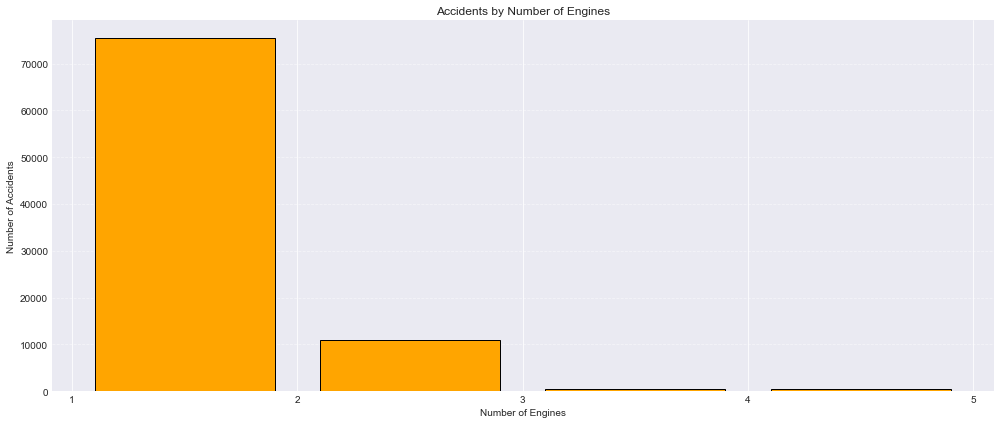

In [31]:
# Plot figure
plt.figure(figsize=(14, 6))

# Use histogram to plot
df['Number_of_engines'].plot(kind = 'hist', bins = range(1, 6), rwidth = 0.8, color = 'orange', edgecolor = 'black')
plt.title('Accidents by Number of Engines')
plt.xlabel('Number of Engines')
plt.ylabel('Number of Accidents')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.5)
plt.xticks(range(1, 6))
plt.tight_layout()
plt.savefig('Images/engines.png', dpi=300, bbox_inches='tight') # saves visual to image folder of my project
plt.show()


The majority of accidents involved single-engine aircraft, accounting for over 70,000 incidents, while aircraft with two or more engines had significantly fewer accidents.

#### Aircraft Accident Patterns by Purpose of Flight
This section analyzes accident patterns based on the purpose of flight, focusing on personal, instructional, business, and executive operations.

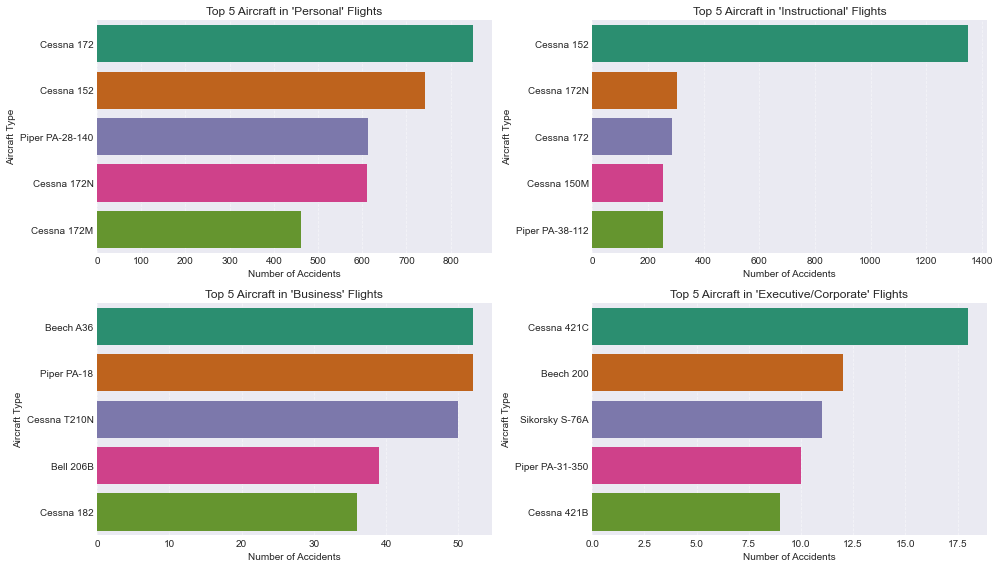

In [32]:
# Clean and standardize purpose of flight column
df['Purpose_clean'] = df['Purpose_of_flight'].str.upper().str.strip()

# Define relevant purposes for the company 
relevant_purposes = ['PERSONAL', 'INSTRUCTIONAL', 'BUSINESS', 'EXECUTIVE/CORPORATE']

# Filter dataset to relevant purposes
df_relevant = df[df['Purpose_clean'].isin(relevant_purposes)]

# Group by purpose and aircraft type
grouped = df_relevant.groupby(['Purpose_clean', 'Aircraft_Type']).size().reset_index(name = 'Count')

# Get top 5 aircraft for each purpose
top5_per_purpose = (grouped.groupby('Purpose_clean').apply(lambda x: x.nlargest(5, 'Count')).reset_index(drop = True))

# Set up plot 2 rows, 2 columns
fig, axes = plt.subplots(2, 2, figsize = (14, 8))
axes = axes.flatten()

# Plot one chart per purpose
for i, purpose in enumerate(relevant_purposes):
    data = top5_per_purpose[top5_per_purpose['Purpose_clean'] == purpose]
    sns.barplot(x = 'Count', y = 'Aircraft_Type', data = data, ax = axes[i], palette = 'Dark2')
    axes[i].set_title(f"Top 5 Aircraft in '{purpose.title()}' Flights")
    axes[i].set_xlabel("Number of Accidents")
    axes[i].set_ylabel("Aircraft Type")
    axes[i].grid(axis = 'x', linestyle = '--', alpha = 0.5)

# Show
plt.tight_layout()
plt.savefig('Images/flight.png', dpi=300, bbox_inches='tight') # saves visual to image folder of my project
plt.show()


The Cessna 152 and 172, 172N dominate accidents under both Instructional and Personal flight purposes.The Beech A36 and Piper PA-18 are the most involved in accidents during business flights, while the Cessna 421C and Beech 200 appear more frequently in executive or corporate flight accidents

## Business Recommendation
##### 1. Accident Trends Over Time (High vs. Low-Risk Aircraft)
Recommendation: Favor the low-incident aircraft for early adoption. Approach high-incident models like the Cessna 152 and 172 with caution, only include them if comprehensive safety training and maintenance frameworks are established.

##### 2. Accidents by Phase of Flight
Recommendation: The takeoff, landing, and cruise phases are the most accident-prone, with the Cessna 152 frequently involved therefore,select aircraft with proven stability and safety during these critical flight phases. Emphasize scenario-based simulation training for pilots to handle real-world challenges during these moments.

##### 3. Fatalities Distribution
Recommendation: While light aircraft have higher accident frequency, Boeing 737 and 737-200 account for the highest number of fatalities per incident due to their large passenger capacity and commercial nature. Therefore, the company should Consider starting with smaller  jets to build operational maturity before scaling to larger, high-capacity aircraft.

##### 4. Number of Engines
Recommendation: Single-engine aircraft dominate the accident statistics, indicating higher vulnerability during mechanical failure or adverse flight conditions. For the company entering the aviation sector, especially in commercial sector, it is advisable to prioritize multi-engine aircraft in the initial purchase.

##### 5. Flight Purpose
Cessna 152, 172, 172N dominate accident counts in Instructional and Personal flights.Beech A36 and Piper PA-18 show frequent accidents in business flights.Cessna 421C and Beechcraft 200 are commonly involved in executive or corporate. Based on the analysis, commercial aviation particularly executive and corporate flights has lower accident rates compared to personal and instructional flying.Entering the commercial sector allows the company to build trust, attract premium clients and scale operations more sustainably.

## Summary 
The analysis of aircraft accident trends, fatality rates, and flight purposes suggests that entering the commercial aviation sector particularly executive and corporate operations is the most strategic and safety aligned choice. High-incident aircraft like the Cessna 152 and 172 should be approached cautiously and the company should prioritize low-incident, multi-engine aircraft with strong safety records, especially during critical phases of flight. To minimize risk and build operational maturity, I advise the company to start with smaller, safer jets, implement scenario-based pilot training, and gradually scale operations positioning itself as a reliable, safety-first aviation provider.